In [1]:
import sklearn
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
path = "/usr/local/ifs/gsb/usf_interns/Parser_Project/ParsedDocumentsFolder_new/"

In [3]:
ls = os.listdir(path)

In [4]:
cik = [fn.split("-")[0].split("_")[-1] for fn in ls]

In [5]:
cik = list(set(cik))

In [6]:
len(cik)

436

In [31]:
def document_similarity(index):
    print(cik[index])
    selected = [fn for fn in ls if cik[index] in fn]
    year = sorted([fn.split("-")[-2] for fn in selected])
    print(year)
    selected_fullpath = [path + fn for fn in selected]
    documents = [open(f).read() for f in selected_fullpath]
    tfidf = TfidfVectorizer().fit_transform(documents)
    pairwise_similarity = tfidf * tfidf.T
#     matrix = pairwise_similarity.todense()
    cosine = cosine_similarity(tfidf, tfidf)
    print(cosine)
    plt.title("Apartment investment & management co from 2013 to 2019",size = 12)
    plt.ylabel("TF-IDF Text Similarity")
    plt.imshow(cosine,cmap=plt.cm.OrRd)
    plt.colorbar()
    plt.savefig("similarity.png")
    plt.show()

0000922864
['13', '14', '15', '16', '17', '18', '19']
[[1.         0.98605371 0.990621   0.99226178 0.99040245 0.99531012
  0.99387921]
 [0.98605371 1.         0.99439857 0.99083442 0.99284398 0.98764067
  0.98897184]
 [0.990621   0.99439857 1.         0.99509321 0.99790381 0.99164459
  0.99192907]
 [0.99226178 0.99083442 0.99509321 1.         0.99672499 0.99372193
  0.99510343]
 [0.99040245 0.99284398 0.99790381 0.99672499 1.         0.99169803
  0.9927078 ]
 [0.99531012 0.98764067 0.99164459 0.99372193 0.99169803 1.
  0.9978015 ]
 [0.99387921 0.98897184 0.99192907 0.99510343 0.9927078  0.9978015
  1.        ]]


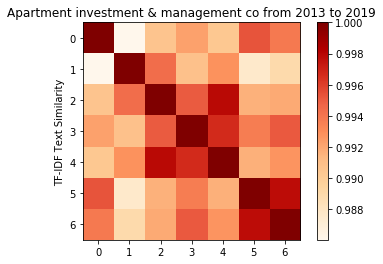

In [32]:
document_similarity(11)

In [14]:
selected = [fn for fn in ls if cik[0] in fn]

In [15]:
selected

['parsed_XML_0000064040-18-000061.txt',
 'parsed_XML_0000064040-19-000059.txt',
 'parsed_XML_0000064040-15-000004.txt',
 'parsed_XML_0000064040-14-000007.txt',
 'parsed_XML_0000064040-16-000042.txt',
 'parsed_XML_0000064040-17-000015.txt',
 'parsed_XML_0000064040-13-000005.txt']

In [17]:
selected_fullpath = [path + fn for fn in selected]

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [open(f).read() for f in selected_fullpath]
tfidf = TfidfVectorizer().fit_transform(documents)
pairwise_similarity = tfidf * tfidf.T

In [20]:
matrix = pairwise_similarity.todense()
matrix

matrix([[1.        , 0.99618388, 0.99253811, 0.99149535, 0.99545411,
         0.9977486 , 0.98834732],
        [0.99618388, 1.        , 0.98884701, 0.98767564, 0.99165157,
         0.99311739, 0.98367217],
        [0.99253811, 0.98884701, 1.        , 0.99777819, 0.99729151,
         0.99544636, 0.99467548],
        [0.99149535, 0.98767564, 0.99777819, 1.        , 0.99543446,
         0.99328759, 0.99746394],
        [0.99545411, 0.99165157, 0.99729151, 0.99543446, 1.        ,
         0.99808464, 0.99295857],
        [0.9977486 , 0.99311739, 0.99544636, 0.99328759, 0.99808464,
         1.        , 0.99076764],
        [0.98834732, 0.98367217, 0.99467548, 0.99746394, 0.99295857,
         0.99076764, 1.        ]])

In [62]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(tfidf, tfidf)
print(cosine)

[[1.         0.32648015]
 [0.32648015 1.        ]]


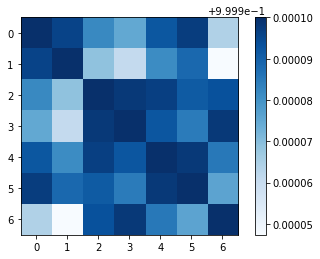

In [59]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(cosine,cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

In [52]:
tfidf

<7x3513 sparse matrix of type '<class 'numpy.float64'>'
	with 17331 stored elements in Compressed Sparse Row format>

In [53]:
documents = ["""A document is a written, drawn, presented, or memorialized representation of thought. The word originates from the Latin documentum, which denotes a "teaching" or "lesson": the verb doceō denotes "to teach". In the past, the word was usually used to denote a written proof useful as evidence of a truth or fact.""","""World War II (often abbreviated to WWII or WW2), also known as the Second World War, was a global war that lasted from 1939 to 1945. The vast majority of the world's countries—including all the great powers—eventually formed two opposing military alliances: the Allies and the Axis."""]
tfidf = TfidfVectorizer().fit_transform(documents)
pairwise_similarity = tfidf * tfidf.T

In [56]:
print(pairwise_similarity.todense())

[[1.         0.32648015]
 [0.32648015 1.        ]]
